<a href="https://colab.research.google.com/github/repitta/CienciaDeDadosEducacionais/blob/master/An%C3%A1lise_LopUsuarioNota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as Bibliotecas**

In [0]:
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Lendo o arquivo CSV lopUsuarioNota**

In [0]:
# Ler o arquivo CSV 
lopNotasLista  = pd.read_csv("https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/arquivosCSV/lopUsuarioNota.csv")
lopNotasProva  = pd.read_csv("https://raw.githubusercontent.com/repitta/CienciaDeDadosEducacionais/master/arquivosCSV/lopUsuarioNotaProva.csv")

**Estrutura do aquivo**

In [16]:
print(lopNotasLista.info())
print(lopNotasLista.head())
print(lopNotasProva.info())
print(lopNotasProva.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 11 columns):
Unnamed: 0        7939 non-null int64
titulo            7939 non-null object
idAluno           7939 non-null object
questoesFeitas    7939 non-null int64
quantidade        7939 non-null int64
NotaLista         7939 non-null float64
ano               7939 non-null float64
descricaoTurma    7939 non-null object
idTurma           7939 non-null object
matricula         7939 non-null int64
nome              7939 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 682.3+ KB
None
   Unnamed: 0  ...                           nome
0           0  ...                         Amanda
1           1  ...  Emanuel Fernandes P. da Rocha
2           2  ...                   Andrey Costa
3           3  ...                       Fernanda
4           4  ...                 Jayedson Brito

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945


**Pré-processamento**

In [0]:
##Tabela lopNotasLista
#excluir a coluna Unnamed
lopNotasLista = lopNotasLista[['titulo', 'idAluno', 'questoesFeitas', 'quantidade','NotaLista', 'ano', 'descricaoTurma', 'idTurma', 'matricula',"nome"]]
#dividir a coluna NotasLista por 10 , pq elas estão em porcentagem
lopNotasLista["NotaLista"] = lopNotasLista["NotaLista"] /10
#colocar letra maiuscula na coluna nome
lopNotasLista["nome"] = lopNotasLista["nome"].str.upper()

##Tabela lopNotasProva
lopNotasProva = lopNotasProva.dropna(axis=1, how='all') 
lopNotasProva = lopNotasProva[['tituloProva', 'idAluno', 'questoesFeitasProva', 'quantidadeProva','NotaProva', 'ano', 'descricaoTurma', 'idTurma', 'matricula',"nome"]]
#dividir a coluna NotasLista por 10 , pq elas estão em porcentagem
lopNotasProva["NotaProva"] = lopNotasProva["NotaProva"] /10
#colocar letra maiuscula na coluna nome
lopNotasProva["nome"] = lopNotasProva["nome"].str.upper()

In [18]:
lopNotasLista.head(1)

,titulo,idAluno,questoesFeitas,quantidade,NotaLista,ano,descricaoTurma,idTurma,matricula,nome
0,Lista de Exercícios 1 - Expressões e variáveis,5991cb910be9d42f2f68b906,11,15,7.333333,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01A,598e15296d8650eb27d52e3d,20170039453,AMANDA


In [19]:
lopNotasProva.head(1)

,tituloProva,idAluno,questoesFeitasProva,quantidadeProva,NotaProva,ano,descricaoTurma,idTurma,matricula,nome
0,Prova 02 - Turmas 3A e 3B - 2018.1,59bf9b47e228af38d3ff3b6b,2,2,5.0,NaN,NaN,5ae078b65c7ccb1a0c9f6042,NaN,NaN


**Funcao para formar a tabela de notas de todas as listas de exercicios**

In [0]:
def tabelaNotasLista(ano,turma):
  colunas    = ["matricula","nome"]
  tabelaListas = pd.DataFrame(columns=colunas)
  listas = ["Exercícios 5", "Exercícios 4.1", "Exercícios 4", "Exercícios 3", "Exercícios 2","Exercícios 1",
            "Laboratório 5","Laboratório 4", "Laboratório 3", "Laboratório 2","Laboratório 1"]
  for l in listas:
    notasTurma = lopNotasLista.loc[(lopNotas["ano"] == ano) & (lopNotasLista["descricaoTurma"].str.contains(turma, regex=False)) &
                 (lopNotasLista["titulo"].str.contains(l, regex=False)),["matricula","nome","NotaLista","questoesFeitas"]]
    notasTurma = notasTurma.sort_values("nome")
    tabelaListas = pd.merge(notasTurma,tabelaListas,on=['matricula','nome'], how="outer") 
    
  tabelaListas.columns = ['matricula', 'nome',"lab1","qLab1","lab2","qLab2","lab3","qLab3","lab4","qLab4","lab5","qLab5","exe1","qexe1","exe2","qexe2",
  "exe3","qexe3","exe4","qexe4","exe4.1","qexe4.1","exe5","qexe5"]
  tabelaListas = tabelaListas.drop_duplicates()
  tabelaListas = tabelaListas.sort_values('nome')
  return tabelaListas
  
tabelaLista = tabelaNotasLista(2019.1,"Turma 02D")
tabelaLista.to_excel(r'tabelaNotas2019Turma02D.xls')


**Função para formar a tabela das notas de todas as provas**

In [0]:
def tabelaNotasProva(ano,turma):
  colunas = ["matricula","nome"]
  tabelaProvas = pd.DataFrame(columns=colunas)
  notasTurmaProva = lopNotasProva.loc[(lopNotasProva["ano"] == ano) & (lopNotasProva["descricaoTurma"].str.contains(turma, regex=False)),["matricula","nome","tituloProva","NotaProva","questoesFeitasProva"]]
  notasTurmaProva = notasTurmaProva.sort_values("nome")
  tabelaProvas = pd.merge(notasTurmaProva,tabelaProvas,on=['matricula','nome'], how="outer")
  tabelaProvas = tabelaProvas.drop_duplicates()
  tabelaProvas = tabelaProvas.sort_values('nome')
  return tabelaProvas
  
tabelaProvas = tabelaNotasProva(2018.2,"Turma 02A")
tabelaProvas.to_excel(r'tabelaNotasProva2018Turma02A.xls')

**Tabela de notas e quantidade de questões feitas por aluno por turma por lista**

In [0]:
notasTurma = lopNotas.loc[(lopNotas["ano"] == 2019.1) & (lopNotas["descricaoTurma"].str.contains("Turma 01A", regex=False)) &
                          (lopNotas["titulo"].str.contains("Lista de Exercícios 4", regex=False)),["nome","NotaLista","questoesFeitas"]]
notasTurma = notasTurma.sort_values("nome")
print("Quantidade de alunos que fizeram a lista:", notasTurma.shape[0])
print(notasTurma)


In [0]:
quanListAluno.loc[quanListAluno["titulo"].str.contains("Lista de Exercícios 1", regex=False),["ano","idAluno","totalAlunos"]]

,ano,idAluno,totalAlunos
0,2017.2,128,245
18,2018.1,161,204
39,2018.2,228,244
62,2019.1,198,211


In [0]:
quanListAluno.head()

,index,ano,totalAlunos,titulo,idAluno,questoesFeitas,quantidade,NotaLista,descricaoTurma,idTurma,matricula,nome
0,0,2017.2,245,Lista de Exercícios 1 - Expressões e variáveis,128,128,128,128,128,128,128,128
1,1,2017.2,245,Lista de Exercícios 2 - Estruturas Condicionais,157,157,157,157,157,157,157,157
2,2,2017.2,245,Lista de Exercícios 3 - Laço Condicional,211,211,211,211,211,211,211,211
3,3,2017.2,245,Lista de Exercícios 4 - Laço contado,156,156,156,156,156,156,156,156
4,4,2017.2,245,Lista de Exercícios 4.1 - Problemas tradiciona...,60,60,60,60,60,60,60,60


**Gráfico para mostrar a quantidade de alunos que enviaram as listas ao longo dos anos**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


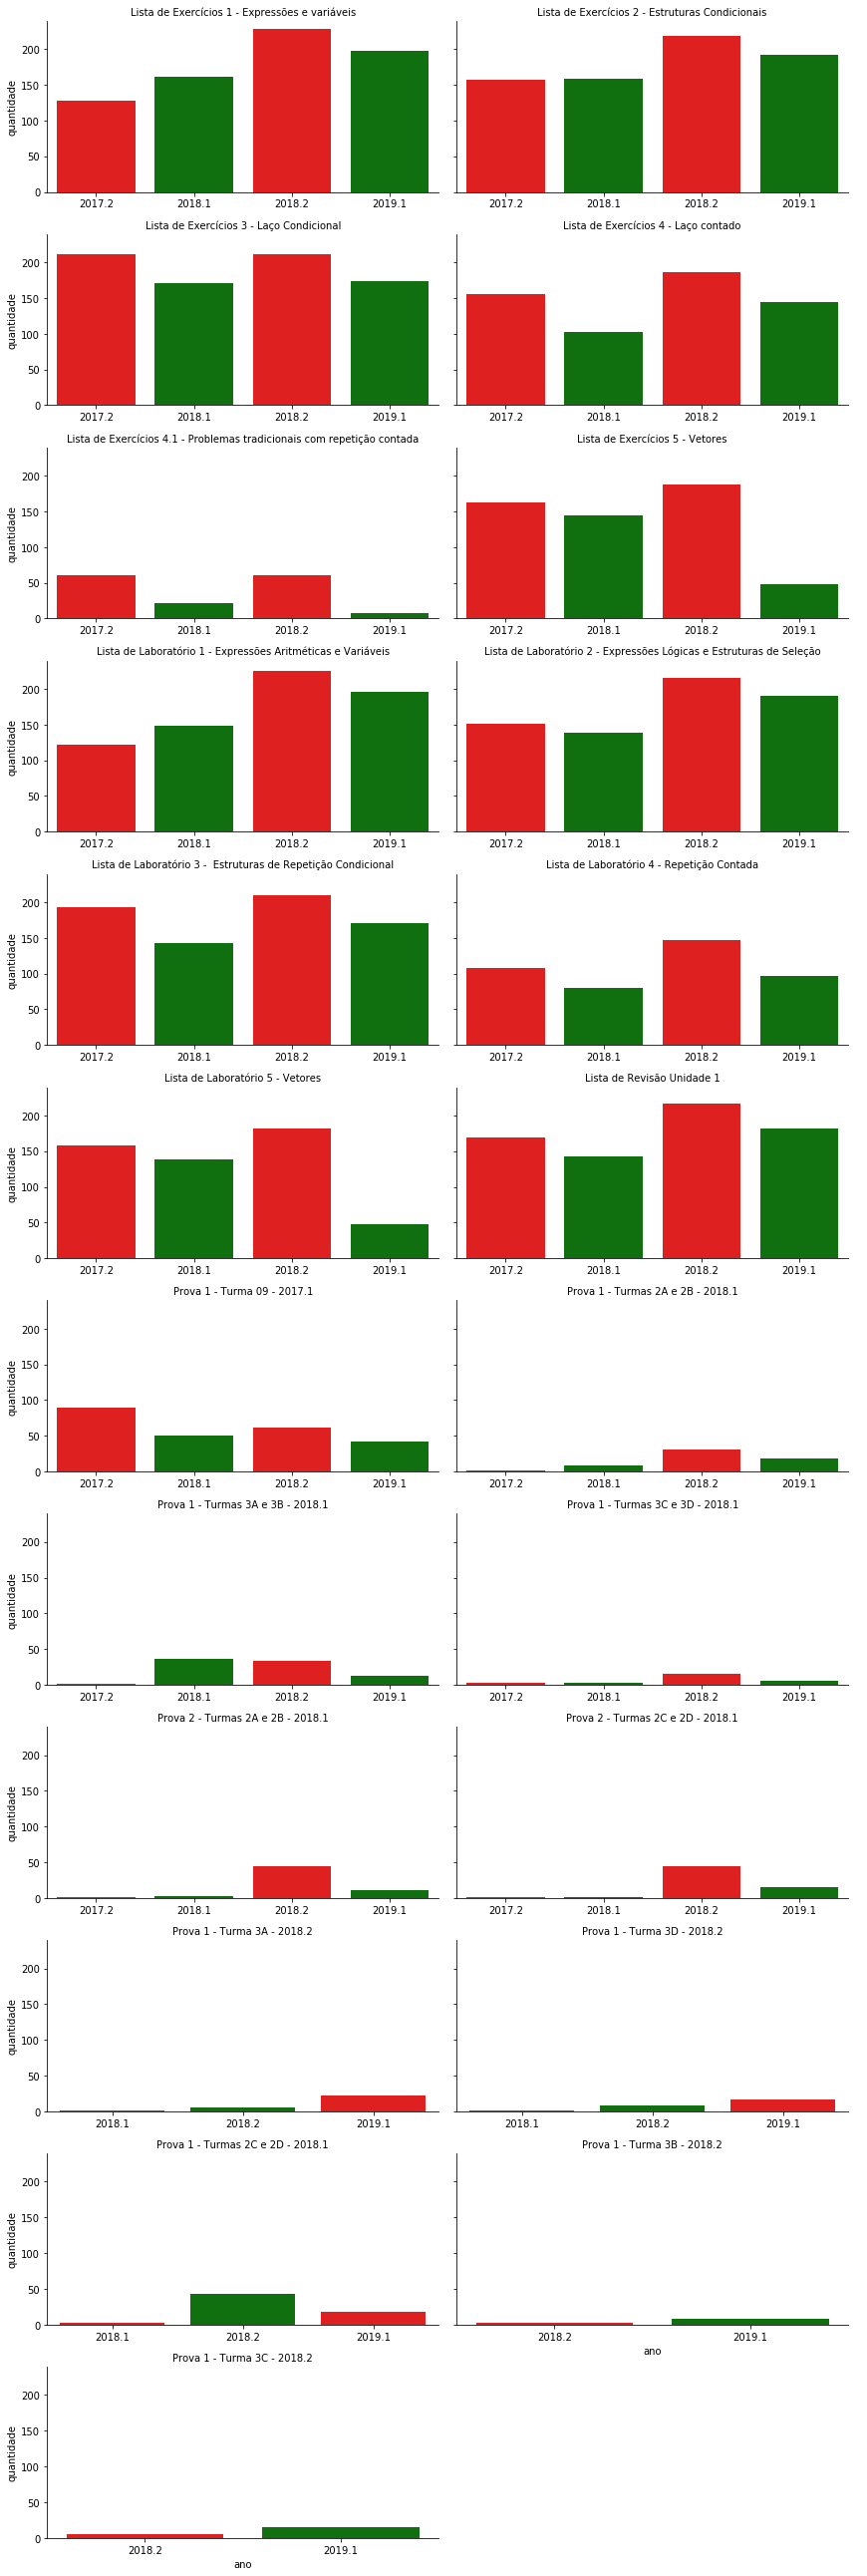

In [6]:
#Contar quantos alunos submeteram cada lista ao longo do tempo
quanLista = lopNotas.groupby(['titulo','ano']).count()
quanLista = quanLista.reset_index()
#print(quanLista.head())

#contar quantos alunos estão cadastrados ao longo do tempo
c = lopNotas.groupby('ano')["idAluno"].unique()
c = c.reset_index()
alunoAno ={}
dtAlunoAno = pd.DataFrame()
for i in c["ano"].unique():
  q = c.loc[c["ano"] == i ,"idAluno"]
  alunoAno[i] = len(q.iloc[0])
dtAlunoAno["ano"] = alunoAno.keys()
dtAlunoAno["totalAlunos"] = alunoAno.values()
#dtAlunoAno

quanListAluno = pd.merge(dtAlunoAno,quanLista,on=['ano'], how="outer")
quanListAluno = quanListAluno.reset_index()

# Creating graphics with Seaborn
gQuandLista = sns.FacetGrid(quanListAluno, col = "titulo", col_wrap =2, height=3, aspect=2, sharex=False)
bp=gQuandLista.map(sns.barplot,"ano","idAluno" ,palette=sns.color_palette(['red','green']))

bp.add_legend()
bp.set_titles("{col_name}")
bp.set_ylabels("quantidade")
bp.set_xlabels("ano")
plt.show()


In [0]:
data=pd.DataFrame({'A':['X','X','Y','Y','X','X','Y','Y'],
               'B':[0,1,2,3,4,5,6,7],
               'C':[1,1,1,1,2,2,2,2],
               'type':['ctrl','cond1','ctrl','cond1','ctrl','cond1','ctrl','cond1']})
print(data.head(2))
print(quanListAluno.head(2))

   A  B  C   type
0  X  0  1   ctrl
1  X  1  1  cond1
   index     ano  totalAlunos  ... idTurma  matricula  nome
0      0  2017.2          245  ...     128        128   128
1      1  2017.2          245  ...     157        157   157

[2 rows x 12 columns]


**Gráfico para mostrar as médias das notas das listas ao longo do tempo**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


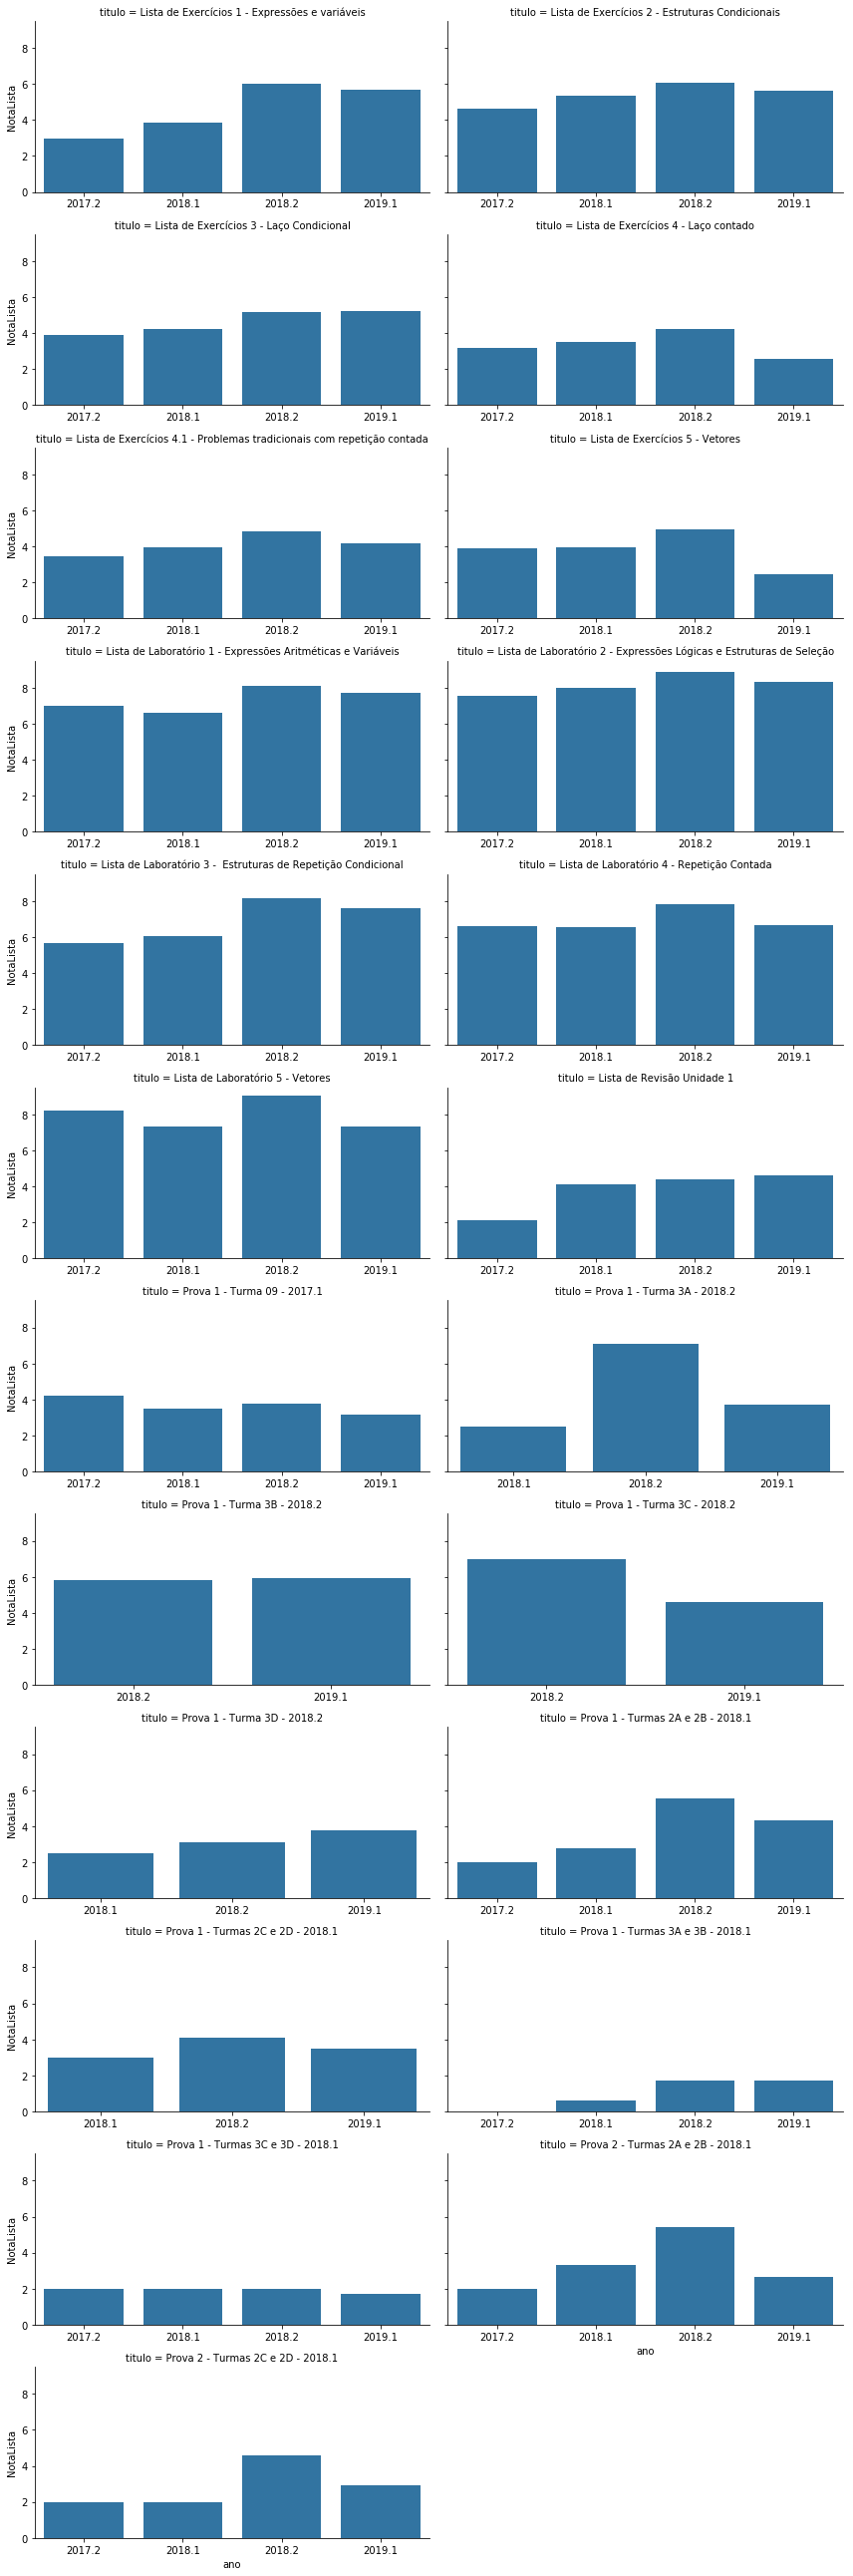

In [0]:
mediaNota = lopNotas.groupby(['titulo','ano'])["NotaLista"].mean()
mediaNota = mediaNota.reset_index()
#print(mediaNota[["titulo",'NotaLista',"ano"]])

# Creating graphics with Seaborn
gMediaNota = sns.FacetGrid(mediaNota, col = "titulo", col_wrap=2, height=3, aspect=2, sharex=False)
gMediaNota.map(sns.barplot,"ano", "NotaLista")
plt.show()